<a href="https://colab.research.google.com/github/kanigaaPB/KanigaaPB/blob/main/AIML23it028_confusion(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


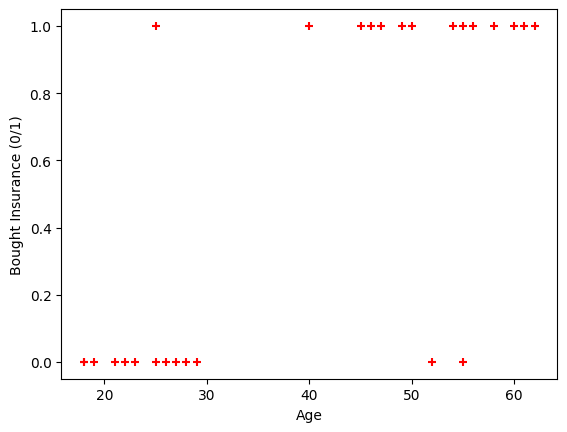

In [ ]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.xlabel("Age")
plt.ylabel("Bought Insurance (0/1)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['age']], df.bought_insurance, train_size=0.8, random_state=42
)

X_test.head()


,age
8,62
13,29
9,61
21,26
0,22


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)
print("Predictions:", y_predicted)
print("Accuracy:", model.score(X_test, y_test))


Predictions: [1 0 1 0 0 0]
Accuracy: 1.0


In [ ]:
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient: [[0.11307708]]
Intercept: [-4.15311919]


In [ ]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))


In [ ]:
def prediction_function(age):
    z = 0.042 * age - 1.53   # approximated values
    y = sigmoid(z)
    return y


In [ ]:
age = 35
print("Prediction for age 35:", prediction_function(age))

age = 43
print("Prediction for age 43:", prediction_function(age))


Prediction for age 35: 0.4850044983805899
Prediction for age 43: 0.568565299077705


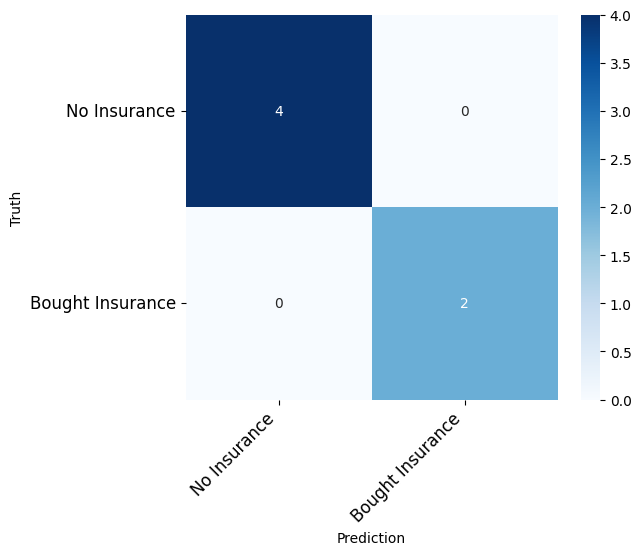

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [4]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv("insurance_data.csv")

# 3. Train-test split
X = df[['age']]
y = df['bought_insurance']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

# 4. Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predictions
y_predicted = model.predict(X_test)

# 6. Confusion Matrix + Plot
def print_confusion_matrix(confusion_matrix, class_names, figsize=(6,5), fontsize=12):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    heatmap.yaxis.set_ticklabels(
        heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize
    )
    heatmap.xaxis.set_ticklabels(
        heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize
    )
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    plt.show()

cm = confusion_matrix(y_test, y_predicted)
print_confusion_matrix(cm, ["No Insurance", "Bought Insurance"])

# 7. Classification Report
print(classification_report(y_test, y_predicted))

